In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools
from itertools import chain

import warnings
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
warnings.filterwarnings('ignore') #ignore warning messages 

In [34]:
df = pd.read_csv('../data/breast-cancer-wisconsin-data_data.csv')
df = df.iloc[:,:-1] #drop last empty row

# Exploratory Data Analysis (10 points)

In [18]:
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   
7  ...         17.06          28.14           110.60       897.0   
8  ...         15.49          30.73           106.20       739.3   
9  ...         15.09          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  
7          0.3196                  0.11510  
8          0.4378                  0.10720  
9          0.4366                  0.20750  

[10 rows x 32 columns]

In [11]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

#### Replace target variable value to M<-1, B<-0

In [17]:
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

### Balances of each class in the target variable & Visualization

# of Benign : 357 ( 0.6274165202108963 ) 
# of Malignant : 212 ( 0.37258347978910367 )


Text(0, 0.5, 'count')

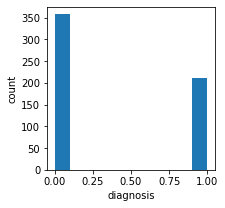

In [18]:
# B = benign, M = malignant
# HISTOGRAM-------------------
B, M = df['diagnosis'].value_counts()
print('# of Benign :',B,'(',B/(B+M),')','\n# of Malignant :',M,'(',M/(M+B),')')
plt.figure(figsize=(3,3))
plt.hist(df['diagnosis'])
plt.xlabel('diagnosis')
plt.ylabel('count')

In [19]:
# PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=0.5)))


layout = dict(title =  'Balance of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

### Get name of columns (mean/se/worst)

In [20]:
features = list(df)

features_mean = list(df.iloc[:,2:12])
features_se = list(df.iloc[:,12:22])
features_worst = list(df.iloc[:,22:32])

print('features_mean :',features_mean, '\nfeatures_se :',features_se, '\nfeatures_worst :',features_worst)

features_mean : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 
features_se : ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'] 
features_worst : ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### [Visualization]  Histogram of features_mean

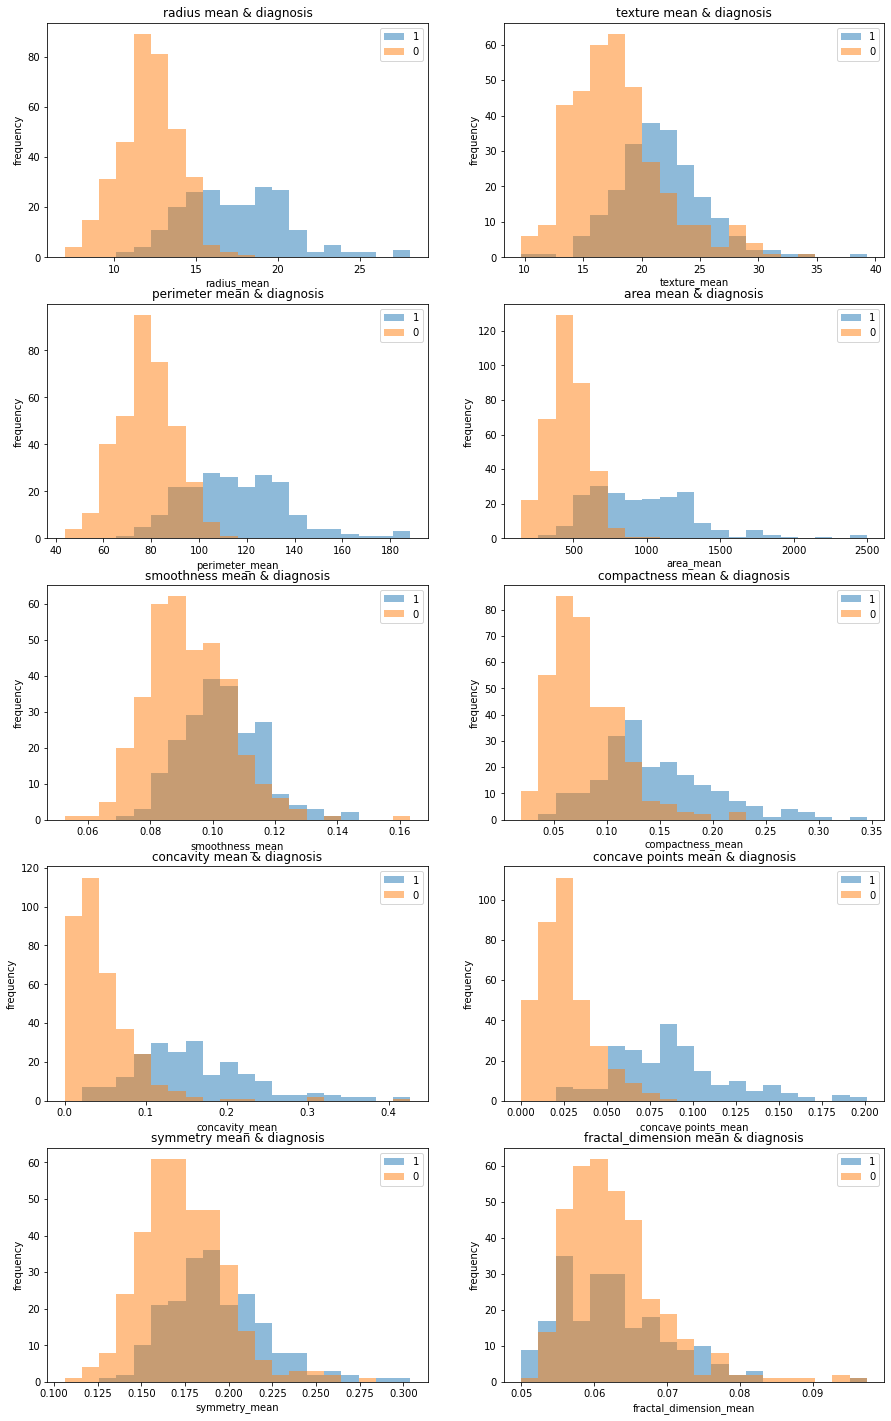

In [21]:
categories = df['diagnosis'].unique()

bin_range_rm = (df['radius_mean'].min(), df['radius_mean'].max())
bin_range_tm = (df['texture_mean'].min(), df['texture_mean'].max())
bin_range_pm = (df['perimeter_mean'].min(), df['perimeter_mean'].max())
bin_range_am = (df['area_mean'].min(), df['area_mean'].max())
bin_range_sm = (df['smoothness_mean'].min(), df['smoothness_mean'].max())
bin_range_cpm = (df['compactness_mean'].min(), df['compactness_mean'].max())
bin_range_ccm = (df['concavity_mean'].min(), df['concavity_mean'].max())
bin_range_ctm = (df['concave points_mean'].min(), df['concave points_mean'].max())
bin_range_sym = (df['symmetry_mean'].min(), df['symmetry_mean'].max())
bin_range_fm = (df['fractal_dimension_mean'].min(), df['fractal_dimension_mean'].max())

fig, axs = plt.subplots(5,2,figsize=(15,25))
#fig, axs = plt.subplots(3, 4)
for c in categories :
    axs[0,0].hist(df[df['diagnosis']==c]['radius_mean'], alpha=0.5, label=c, range=bin_range_rm, bins=20)
    axs[0,0].legend()
    axs[0,0].set(xlabel="radius_mean", ylabel="frequency", title='radius mean & diagnosis')

    axs[0,1].hist(df[df['diagnosis']==c]['texture_mean'], alpha=0.5, label=c, range=bin_range_tm, bins=20)
    axs[0,1].legend()
    axs[0,1].set(xlabel="texture_mean", ylabel="frequency", title='texture mean & diagnosis')
    
    axs[1,0].hist(df[df['diagnosis']==c]['perimeter_mean'], alpha=0.5, label=c, range=bin_range_pm, bins=20)
    axs[1,0].legend()
    axs[1,0].set(xlabel="perimeter_mean", ylabel="frequency", title='perimeter mean & diagnosis')
    
    axs[1,1].hist(df[df['diagnosis']==c]['area_mean'], alpha=0.5, label=c, range=bin_range_am, bins=20)
    axs[1,1].legend()
    axs[1,1].set(xlabel="area_mean", ylabel="frequency", title='area mean & diagnosis')
    
    axs[2,0].hist(df[df['diagnosis']==c]['smoothness_mean'], alpha=0.5, label=c, range=bin_range_sm, bins=20)
    axs[2,0].legend()
    axs[2,0].set(xlabel="smoothness_mean", ylabel="frequency", title='smoothness mean & diagnosis')
    
    axs[2,1].hist(df[df['diagnosis']==c]['compactness_mean'], alpha=0.5, label=c, range=bin_range_cpm, bins=20)
    axs[2,1].legend()
    axs[2,1].set(xlabel="compactness_mean", ylabel="frequency", title='compactness mean & diagnosis')
    
    axs[3,0].hist(df[df['diagnosis']==c]['concavity_mean'], alpha=0.5, label=c, range=bin_range_ccm, bins=20)
    axs[3,0].legend()
    axs[3,0].set(xlabel="concavity_mean", ylabel="frequency", title='concavity mean & diagnosis')
    
    axs[3,1].hist(df[df['diagnosis']==c]['concave points_mean'], alpha=0.5, label=c, range=bin_range_ctm, bins=20)
    axs[3,1].legend()
    axs[3,1].set(xlabel="concave points_mean", ylabel="frequency", title='concave points mean & diagnosis')
    
    axs[4,0].hist(df[df['diagnosis']==c]['symmetry_mean'], alpha=0.5, label=c, range=bin_range_sym, bins=20)
    axs[4,0].legend()
    axs[4,0].set(xlabel="symmetry_mean", ylabel="frequency", title='symmetry mean & diagnosis')
    
    axs[4,1].hist(df[df['diagnosis']==c]['fractal_dimension_mean'], alpha=0.5, label=c, range=bin_range_fm, bins=20)
    axs[4,1].legend()
    axs[4,1].set(xlabel="fractal_dimension_mean", ylabel="frequency", title='fractal_dimension mean & diagnosis')

plt.show()

###  [Visualization] Plot Distribution of features_mean

In [22]:
M = df[(df['diagnosis'] != 0)]
B = df[(df['diagnosis'] == 0)]

In [31]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    txt = 'Histogram & Distribution plot of ' + data_select
    fig['layout'].update(title = txt, xaxis=dict(title=data_select))

    py.iplot(fig, filename = 'Density plot')

In [32]:
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 3)
plot_distribution('area_mean', 30)
plot_distribution('smoothness_mean', .002)
plot_distribution('compactness_mean', .005)
plot_distribution('concavity_mean', .005)
plot_distribution('concave points_mean', .002)
plot_distribution('symmetry_mean', .005)
plot_distribution('fractal_dimension_mean', .001)


###  [Visualization] Violin plot of features_mean

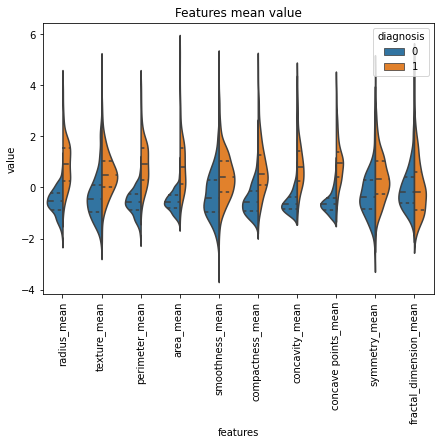

In [19]:
import seaborn as sns
y = df['diagnosis']
data_dia = y
data = df.iloc[:,2:]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title('Features mean value')
plt.show()

### [Visualization] Distribution plot of standard error data

In [35]:
plot_distribution('radius_se', .05)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', 0.5)
plot_distribution('area_se', 10)
plot_distribution('smoothness_se', .0005)
plot_distribution('compactness_se', .002)
plot_distribution('concavity_se', .005)
plot_distribution('concave points_se', .001)
plot_distribution('symmetry_se', .001)
plot_distribution('fractal_dimension_se', .0005)


### [Visualization] Violin plot of standard error data

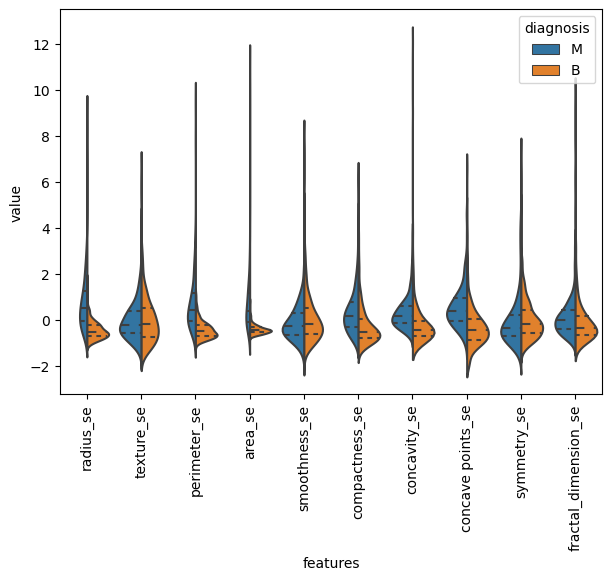

In [151]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

### [Visualization] Distribution plot of worst features data

In [36]:
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 30)
plot_distribution('smoothness_worst', .005)
plot_distribution('compactness_worst', .01)
plot_distribution('concavity_worst', .01)
plot_distribution('concave points_worst', .005)
plot_distribution('symmetry_worst', .01)
plot_distribution('fractal_dimension_worst', .005)

### [Visualization] Violin plot of standard error data

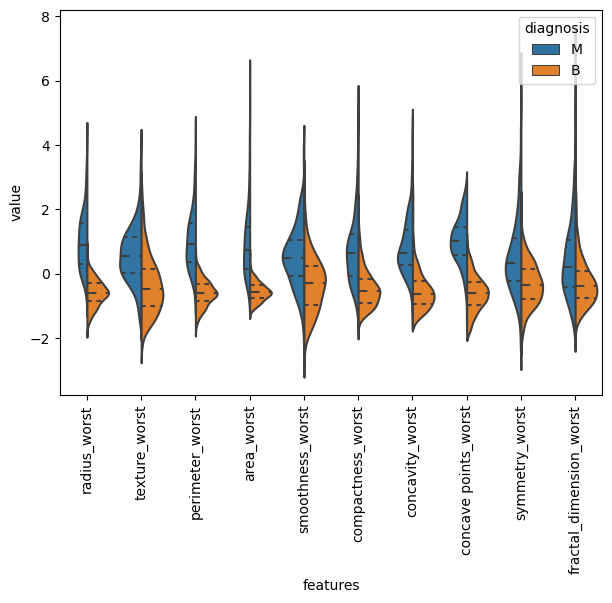

In [152]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(7,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

### [Visualization] Heatmap of features_mean, standard error, worst

<AxesSubplot:>

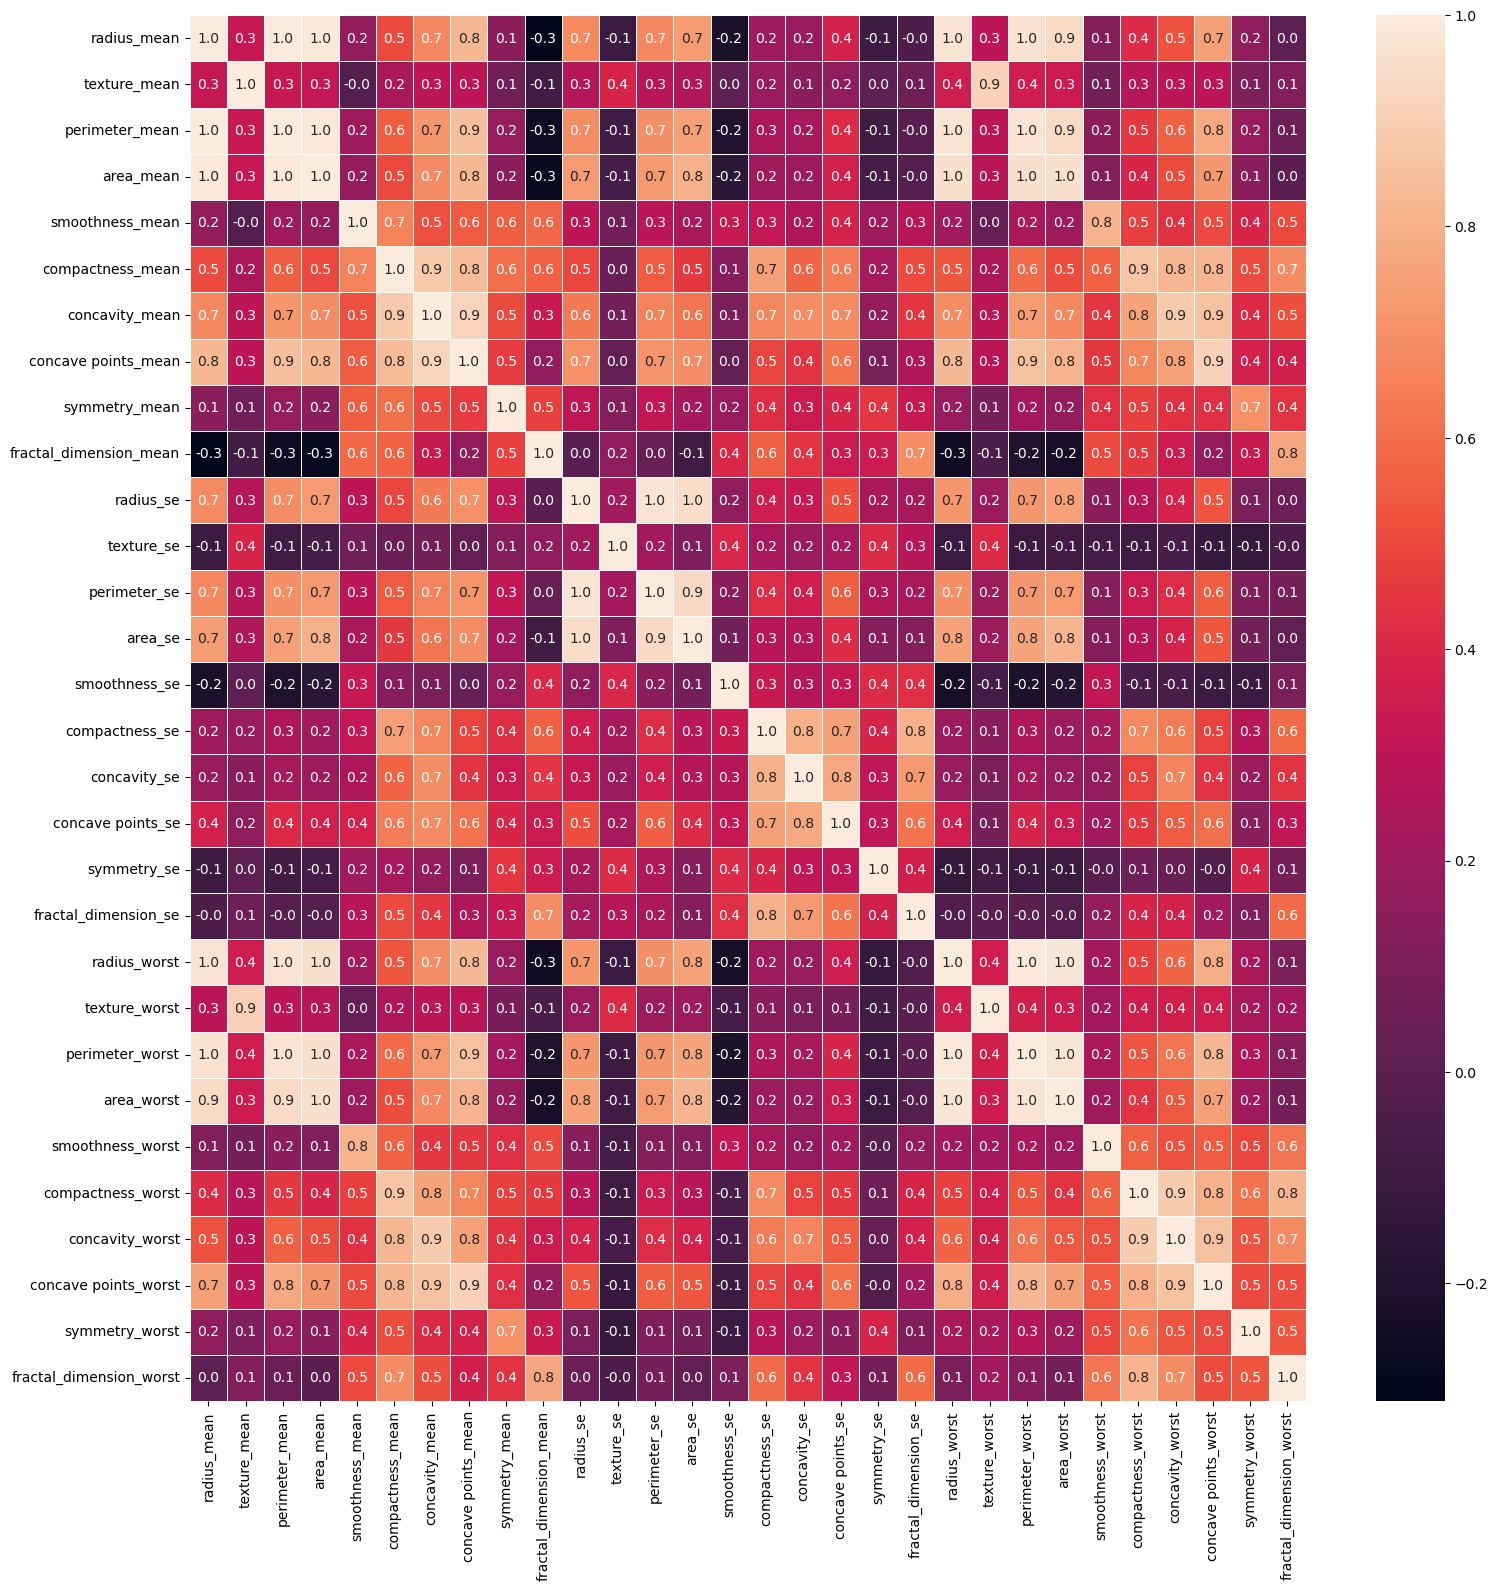

In [158]:
x = df.iloc[:,2:]
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### [Visualization] Heatmap of features_mean

<AxesSubplot:>

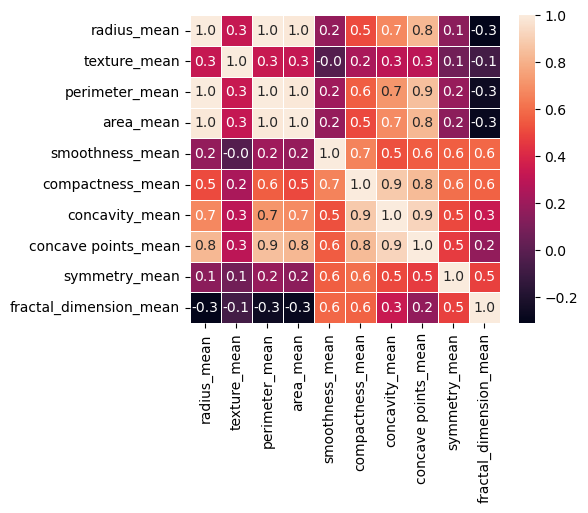

In [164]:
x = df.iloc[:,2:12]
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### [Visualization] Heatmap of standard error

<AxesSubplot:>

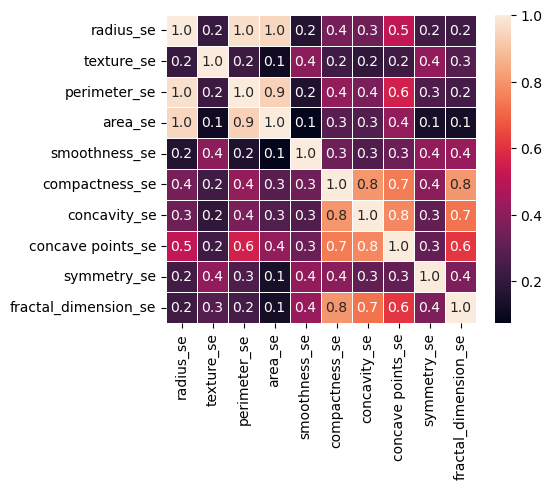

In [165]:
x = df.iloc[:,12:22]
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### [Visualization] Heatmap of worst features

<AxesSubplot:>

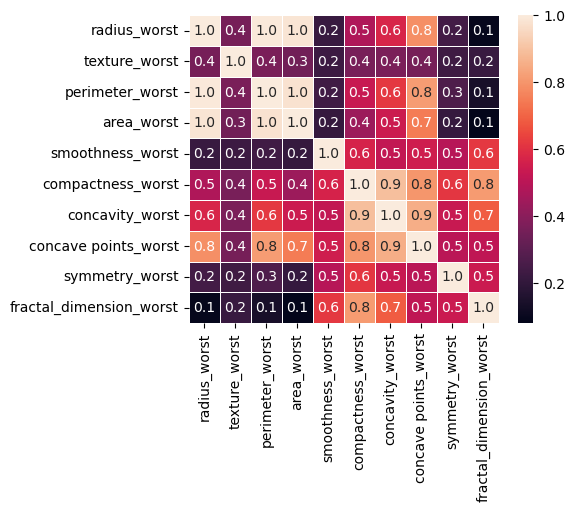

In [166]:
x = df.iloc[:,22:32]
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Preprocessing

In [172]:
features_mean+features_worst

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

y = df['diagnosis'] 
X = df.iloc[:, 2:] 

# first split to separate out the training set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

random_state = 42
std_ftrs = features_mean+features_worst

preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

# 10 KFold split on other
kf = KFold(n_splits=10,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    print(X_train.shape)
    print(X_train_prep.shape, y_train.shape)
    print(X_val_prep.shape, y_val.shape)
    print(X_test_prep.shape, y_test.shape)

(455, 30) (455,)
test set: (114, 30) (114,)
   training set: (409, 30) (409,)
   validation set: (46, 30) (46,)
(409, 30)
(409, 20) (409,)
(46, 20) (46,)
(114, 20) (114,)
   training set: (409, 30) (409,)
   validation set: (46, 30) (46,)
(409, 30)
(409, 20) (409,)
(46, 20) (46,)
(114, 20) (114,)
   training set: (409, 30) (409,)
   validation set: (46, 30) (46,)
(409, 30)
(409, 20) (409,)
(46, 20) (46,)
(114, 20) (114,)
   training set: (409, 30) (409,)
   validation set: (46, 30) (46,)
(409, 30)
(409, 20) (409,)
(46, 20) (46,)
(114, 20) (114,)
   training set: (409, 30) (409,)
   validation set: (46, 30) (46,)
(409, 30)
(409, 20) (409,)
(46, 20) (46,)
(114, 20) (114,)
   training set: (410, 30) (410,)
   validation set: (45, 30) (45,)
(410, 30)
(410, 20) (410,)
(45, 20) (45,)
(114, 20) (114,)
   training set: (410, 30) (410,)
   validation set: (45, 30) (45,)
(410, 30)
(410, 20) (410,)
(45, 20) (45,)
(114, 20) (114,)
   training set: (410, 30) (410,)
   validation set: (45, 30) (45,)